In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <font color='black'>Question1.What exactly is the business problem you are trying to solve? Summarize this in the form of a meaningful problem statement? </font>

## <font color='purple'>Determining the category or variety of grape used in making wines based on several chemical characteristics of individual wines</font>

# <font color='orange'> Problem Statement</font>

## <font color='purple'>Predicting the category or variety of grape used in making wines based on the chemical composition of 13 constituents found in each of the three types of grape</font>


In [ ]:
# Data Required (We need to have data related to charateristics based on which a particular class is assigned to train our model)

# Question2. What are some of preliminary decisions you may need to make based on your problem statement? Your answer should include identification of an initial machine learning algorithm you will apply with respect to the problem statement in (1). Justification should be based on identification of the category of machine learning (supervised, unsupervised, etc.) as well as suggested machine learning algorithm from within the identified machine learning category. 

## <font color='purple'>The business problem we are trying to solve is predicting the type of wine where we are dealing with labeled data.(Cultivar) </font>


# <font color='orange'> Identification of the category of Machine Learning</font>

## <font color='purple'>As we have a classified data where there is a target class(Cultivar) and some characteristics based on which this target is classified, we need to train the model to perform same process </font>

## <font color='purple'>The category of machine learning which deals with labeled data is Supervised Learning </font>


## <font color='purple'>In Supervised learning both input features  and target variable are available for each training data. A supervised learning algorithm then tries to learn the relationship between the input and output variables from the data, so that when input x is given, it is able to produce the corresponding output y. And to do so, the algorithm iterates the training data to adjust the parameters of a model, until it could generalize the data. This is called the learning process. </font>


## <font color='purple'>As we are trying to determine(predict) the category of grape which is a labeled variable we need to choose between the sub division of Supervised Learning  </font>
## <font color='orange'>Regression and Classification</font>
## <font color='purple'>Regression is used when the target variable is numeric and continuous </font>
## <font color='purple'>Classification is used when the target variable is categorical </font>
## <font color='purple'>Our problem has target variable as categorical type (Type of grape) </font>

## <font color='purple'>So under the types of supervised learning algorithms we would eliminate the choice of Linear Regression as it deals with continuous variables  </font>

## <font color='purple'>We need to choose from the further available alogorithms Logistic Regression, Decision Tree and Random Forest</font>

# <font color='orange'> Identification of the category of Machine Learning Algorithm </font>

## <font color='purple'>While all three of the remaining algorithms are applicable to achieve the objective, we will start with Logistic Regression.</font>

## <font color='purple'>The time consumed and complexity of logistic regression model is less when compared to Decision Trees and Random Forests. As there will be creation a multiple branches or if else loops created in case of Decision trees and random forests resulting more time consumption for training the model </font>

## <font color='purple'>As there are three different categories in the target variable so we choose Multinomial Logistic Regression which classifies based on one versus rest method</font>

### In Multi-class logistic regression creates different groups using one versus ret methodology, 
### For example Cultivar1 class the outputs are considered as 1,-1,-1 for Cultivar1, Cultivar2, Cultivar3 respectively  
### In case of Cultivar2 class the outputs are considered as -1,1,-1 for Cultivar1, Cultivar2, Cultivar3 respectively
### Similarly for Cultivar3 is as -1,-1,1 for Cultivar1, Cultivar2, Cultivar3 respectively
### So after this the first model is created as M1 based on input features and the first column outputs for example from above conditions 1,-1,-1 and 
### this model(M1) will be able to predict if the output is Cultivar1 or not
### Similarly M2 model  will be created for Cultivar2 as output
### Similarly M3 model  will be created for Cultivar3 as output

### when test data is given then the output would be calculated from three model M1, M2, M3 (probabilities as otputs)
### Were sum of the three  probabilites is equal to 1
### For generation og prediction the array of three probabilities is considered and the one with highest probability is considered to be the prediction output
### So if the output probabilities are [0.25, 0.25, 0.5] the output would be Cultivar3

In [2]:
#Loading the pandas library
import pandas as pd

In [3]:
#Loading the numpy library
import numpy as np

In [4]:
#Loading sklearn for machine learning packages
import sklearn

In [5]:
## importing the wine dataset with pandas
Wine_DF = pd.read_csv('D://wine.csv', header=0, sep=',')

In [6]:
#Seeing the shape of the dataset
print("Shape of the data contained in wine.csv is", Wine_DF.shape)
#178 observations and 14 columns

Shape of the data contained in wine.csv is (178, 14)


## <font color='purple'>The dataset has 178 observations and 14 columns </font>

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


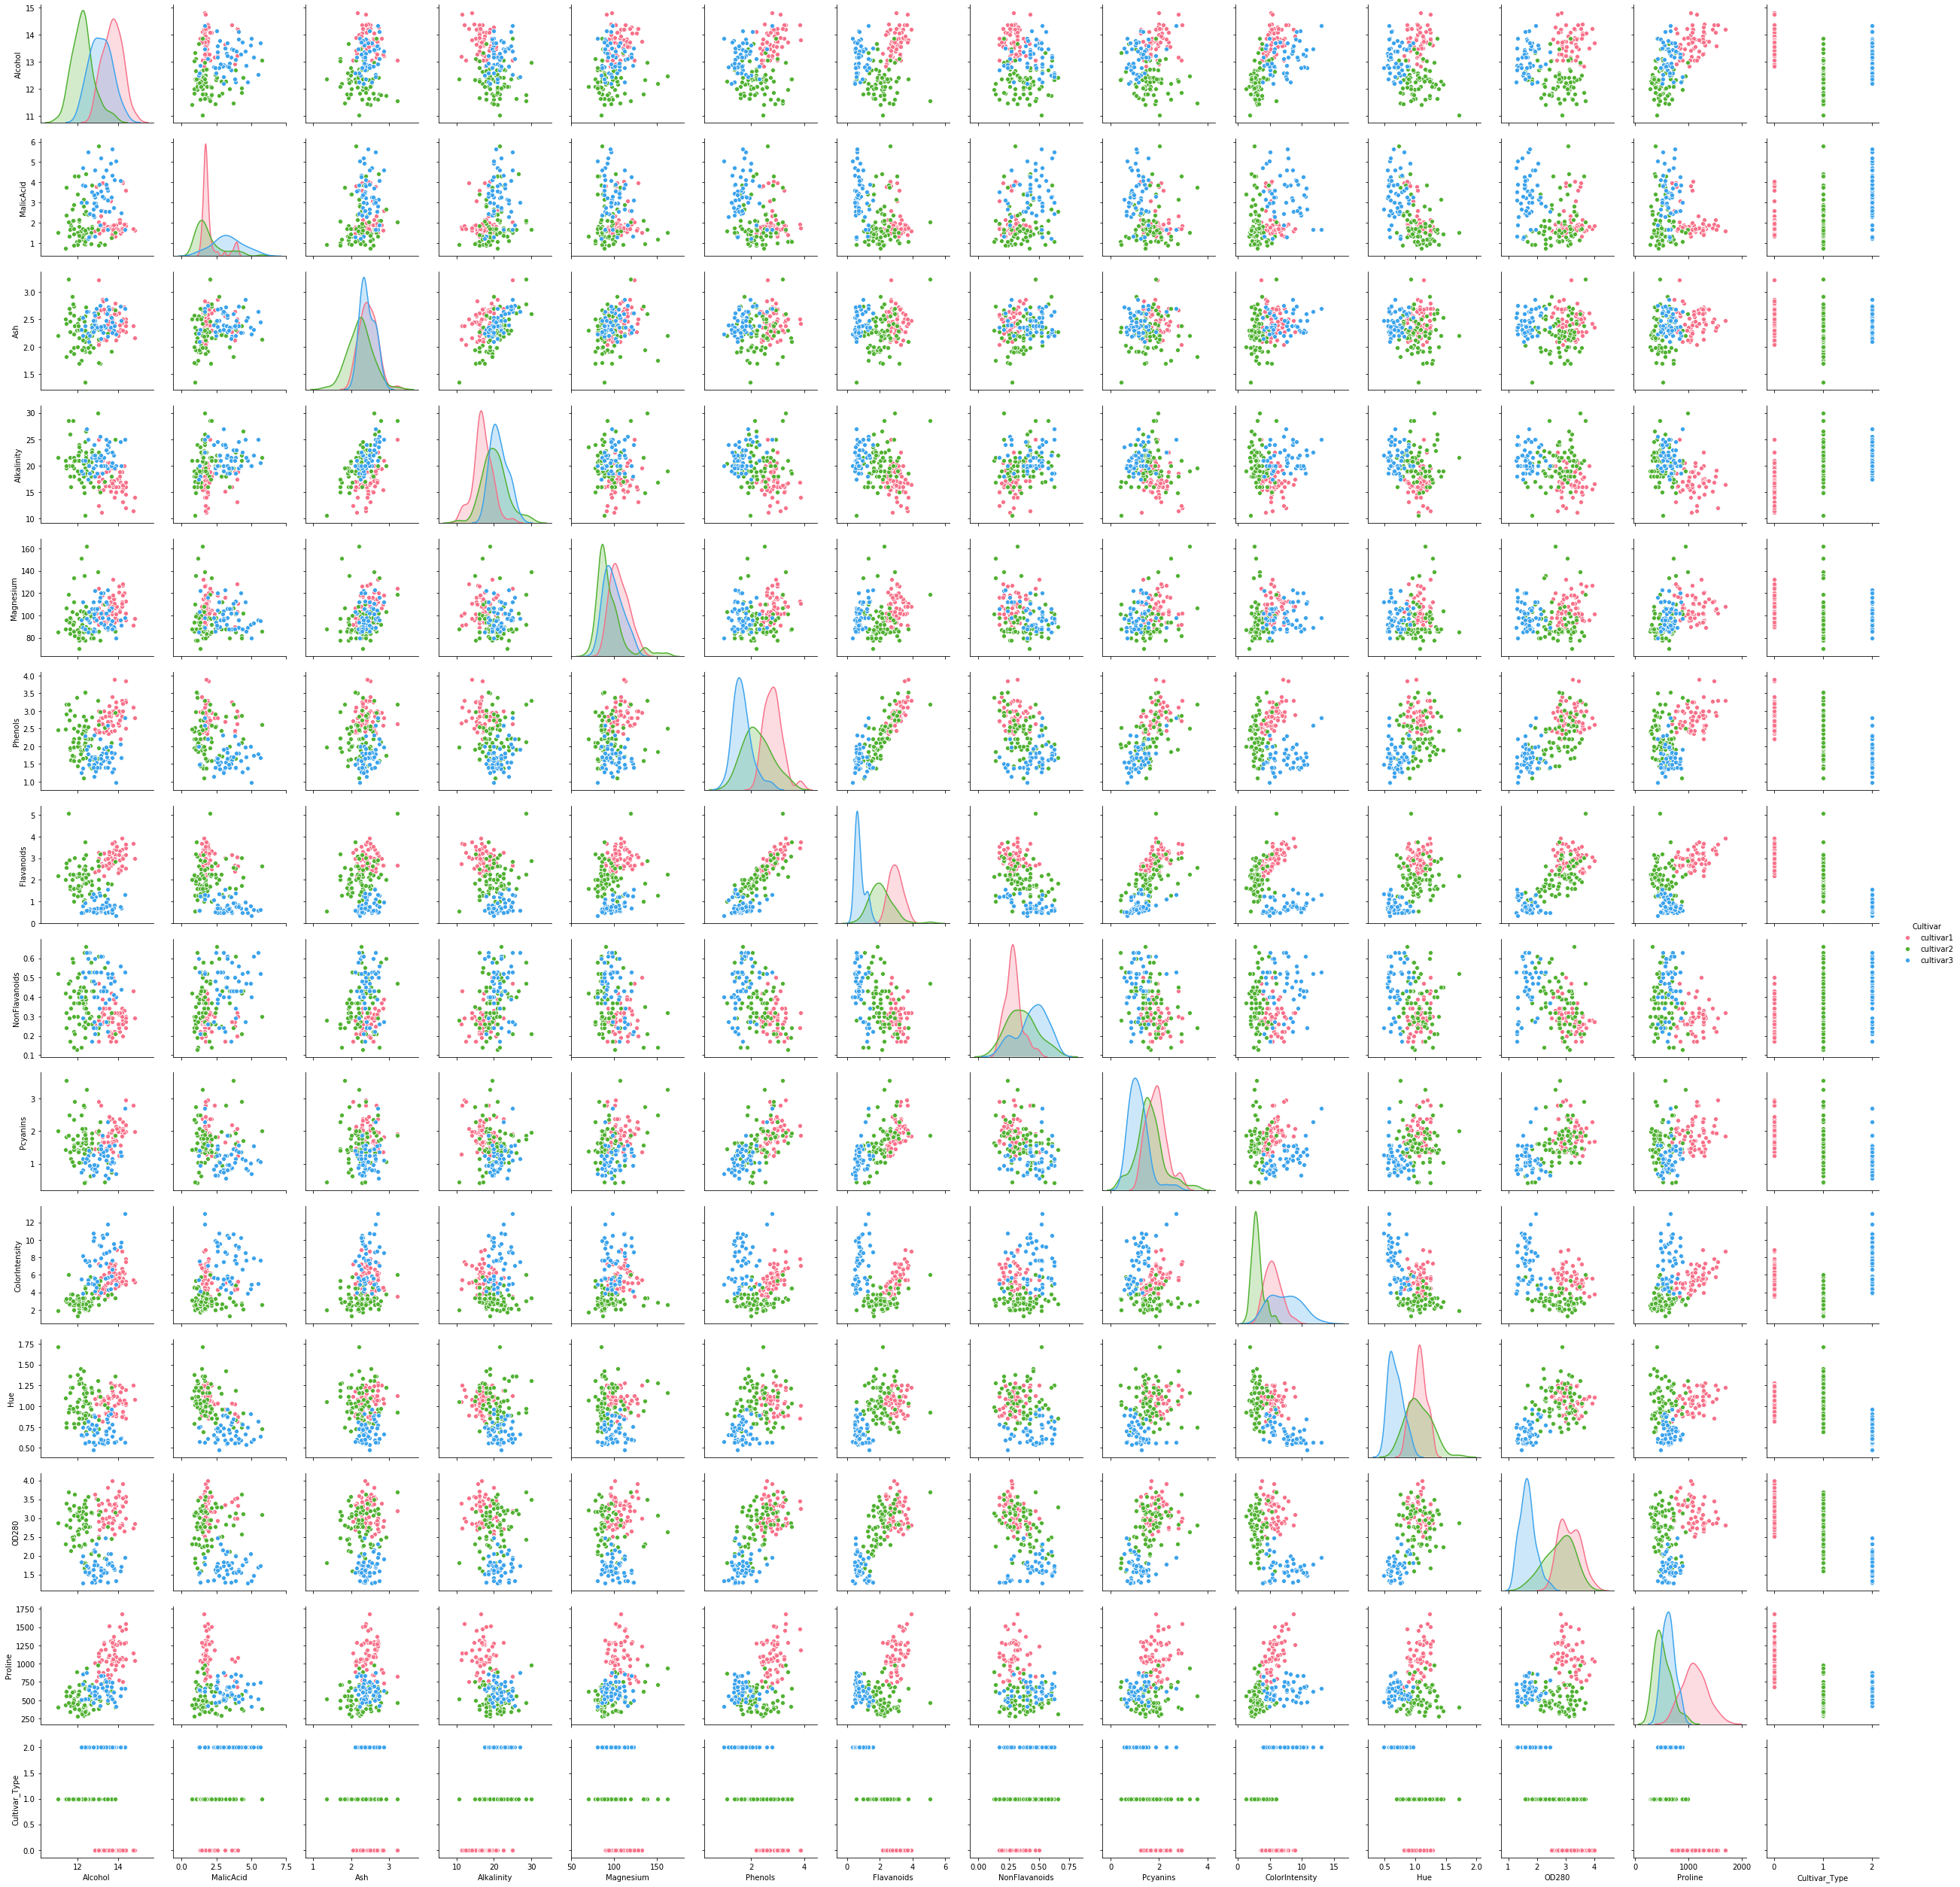

In [148]:
#As it is a classification problem by using pairplot we can see three different classes classified based on the Cultivar
import seaborn as sns
sns.pairplot(Wine_DF, hue = 'Cultivar', palette="husl")


In [8]:
#From the graph above we can see that the data is not hugely overlapping between so we can use the Logistic Regression model for our classification problem

In [9]:
#Looking at the features
Wine_Features = Wine_DF.columns
print("The features (or attributes) recorded  are :", Wine_Features)

The features (or attributes) recorded  are : Index(['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'Alkalinity', 'Magnesium',
       'Phenols', 'Flavanoids', 'NonFlavanoids', 'Pcyanins', 'ColorIntensity',
       'Hue', 'OD280', 'Proline'],
      dtype='object')


## <font color='purple'>The 13 chemical characteristics of wines are 'Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'Alkalinity', 'Magnesium','Phenols', 'Flavanoids', 'NonFlavanoids', 'Pcyanins', 'ColorIntensity','Hue', 'OD280', 'Proline' </font>

In [10]:
#Displaying the datatypes of each column
Wine_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cultivar        178 non-null    object 
 1   Alcohol         178 non-null    float64
 2   MalicAcid       178 non-null    float64
 3   Ash             178 non-null    float64
 4   Alkalinity      178 non-null    float64
 5   Magnesium       178 non-null    int64  
 6   Phenols         178 non-null    float64
 7   Flavanoids      178 non-null    float64
 8   NonFlavanoids   178 non-null    float64
 9   Pcyanins        178 non-null    float64
 10  ColorIntensity  178 non-null    float64
 11  Hue             178 non-null    float64
 12  OD280           178 non-null    float64
 13  Proline         178 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 19.6+ KB


# 3.	Keeping your preliminary decisions from (2) in mind, peruse the dataset to:
# a. Display the datatype of each of the 14 columns to determine if any of the columns need to be transformed to comply with the requirements of your chosen algorithm. Specify the names of columns that require transformation along with the transformation that need to be performed. Include a reasonable explanation as to why the columns need to be transformed as well as what appropriate transformation will be necessary to make the feature algorithm-compliant.


In [11]:
#Displaying the datatypes of the 14 columns
Wine_DF.dtypes

Cultivar           object
Alcohol           float64
MalicAcid         float64
Ash               float64
Alkalinity        float64
Magnesium           int64
Phenols           float64
Flavanoids        float64
NonFlavanoids     float64
Pcyanins          float64
ColorIntensity    float64
Hue               float64
OD280             float64
Proline             int64
dtype: object

## <font color='purple'>The dataset has all the features in numeric type and only the label variable Cultivar in object type </font>

## <font color='purple'>As the label column has object datatype converting it into its actual data type </font>

In [12]:
#Converting Cultivar dataframe to display actual datatypes
Wine_DF = Wine_DF.convert_dtypes()

In [13]:
#After conversion looking at the datatypes
Wine_DF.dtypes

Cultivar           string
Alcohol           float64
MalicAcid         float64
Ash               float64
Alkalinity        float64
Magnesium           Int64
Phenols           float64
Flavanoids        float64
NonFlavanoids     float64
Pcyanins          float64
ColorIntensity    float64
Hue               float64
OD280             float64
Proline             Int64
dtype: object

## <font color='purple'>Logistic Regression requires that variables (feature and target) all need to be numeric (int, double, or float). Target field(Cultivar) in our dataset is of string datatype. Therefore, we will need to convert the variables into their numeric representations.
### <font color='blue'> Label variable, Cultivar, is categorical with three categories. So, all we need to do is convert Cultivar1, Cultivar2, Cultivar3 values into appropriate numeric values such as 0/1/2 - This can be handled easily with Sklearn's Label Encoding function.</font>

In [14]:
#Transforming the target variable to numeric type for further analysis

In [15]:
from sklearn.preprocessing import LabelEncoder
#Creating an instance of the LabelEncoder class
label_encode  = LabelEncoder()            
#Apply the label_encode to fit_transform the Cultivar column, by creating a new column named 'Cultivar_Type'
Wine_DF['Cultivar_Type'] = label_encode.fit_transform(Wine_DF['Cultivar'])

In [16]:
#Label Encoder acts as a mapping function or String Indexer and generates corresponding numbers to the string value

In [17]:
#Looking at data after encoding
Wine_DF.dtypes

Cultivar           string
Alcohol           float64
MalicAcid         float64
Ash               float64
Alkalinity        float64
Magnesium           Int64
Phenols           float64
Flavanoids        float64
NonFlavanoids     float64
Pcyanins          float64
ColorIntensity    float64
Hue               float64
OD280             float64
Proline             Int64
Cultivar_Type       int64
dtype: object

## b.Identify any other data cleanup and pre-processing that may be required to get the data ready for your chosen machine learning algorithm. This may include handling missing values. Missing values for any feature are to be replaced with a median value for that feature. State so if missing values are not indicated.

In [18]:
#Checking for null values
Wine_DF.isnull().sum()

Cultivar          0
Alcohol           0
MalicAcid         0
Ash               0
Alkalinity        0
Magnesium         0
Phenols           0
Flavanoids        0
NonFlavanoids     0
Pcyanins          0
ColorIntensity    0
Hue               0
OD280             0
Proline           0
Cultivar_Type     0
dtype: int64

## <font color='purple'> No null values or missing values are present in the data, so no replacement of values is needed </font>

In [19]:
#target Class distribution
Wine_DF.groupby(['Cultivar']).size()

Cultivar
cultivar1    59
cultivar2    71
cultivar3    48
dtype: int64

In [20]:
#Label Encoded column distribution
Wine_DF.groupby(['Cultivar_Type']).size()

Cultivar_Type
0    59
1    71
2    48
dtype: int64

In [21]:
################################################################################
#Number of Cultivar1 type in training data are (59) -- (59/178)-- 33.14%
#Number of Cultivar2 type in training data are (48) -- (71/115)-- 39.88% 
#Number of Cultivar3 type in training data are (48) -- (48/115)-- 26.96%
#Fairly balaced

## <font color='purple'> From above size of function we can see there is a mis balance in our data as there are more records of Cultivar type2(Cultivar_Code-1(71) </font>

## <font color='purple'>We have a an unbalanced dataset which means that when the model is trained, it is going to learn more from Cultivar2. This will create bias that may come in when the dataset is not balanced. The bias comes since the model is trained with more samples of one case than the other. This may lead the model to predict more one case over another, thus mispredicting some values of the other case.So we have two options to balance the data. One is to eliminate the excess number of samples from the class that has a higher number of samples (if and only if this does not reduce theoverall dataset size significantly) or add samples of category with lower number. </font>

## <font color='purple'>So, we chose to eliminate the excess number of samples from the class that has a higher number of samples Cultivar1 type 0 and Cultivar1 1 </font>

## <font color='purple'>We have a fairly balanced dataset as it does not have huge imbalance in the distribution of Cultivar Types and also due less amount of data.We prefer using all data for training the model rather than elminating few data as the model needs to learn enough from the data to make correct predictions </font>

In [22]:
#So, if we chose to eliminate the excess number of samples from the class that has a higher number of samples Cultivar1 type 0 and Cultivar2 1
#Type_0 = len(Wine_DF[Wine_DF['Cultivar_Code']==0])
#Type_1 = len(Wine_DF[Wine_DF['Cultivar_Code']==1])
#Type_2 = len(Wine_DF[Wine_DF['Cultivar_Code']==2])
#Balanced_Wine_DF = pd.concat( [Wine_DF[Wine_DF['Cultivar_Code']==0].sample(Type_2) ,Wine_DF[Wine_DF['Cultivar_Code']==1].sample(Type_2), Wine_DF[Wine_DF['Cultivar_Code']==2]])
#print(len(Balanced_Wine_DF))

In [23]:
#Balanced_Wine_DF 

In [24]:
#Balanced_Wine_DF.groupby('Cultivar_Code').size()

In [25]:
#Looking at the balanced data
#Balanced_Wine_DF.head() 
#Using above code all the cultivars would be balance to 48 whic is type 3 count

In [26]:
Model_DF = Wine_DF[['Alcohol','MalicAcid','Ash','Alkalinity','Magnesium','Phenols','Flavanoids','NonFlavanoids','Pcyanins','ColorIntensity','Hue','OD280','Proline','Cultivar_Type']]

In [27]:
Model_DF.head() 

,Alcohol,MalicAcid,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,NonFlavanoids,Pcyanins,ColorIntensity,Hue,OD280,Proline,Cultivar_Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


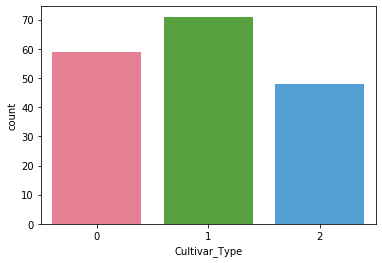

In [28]:
#Interpreting the distribution(balance) of data visually
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'Cultivar_Type', data = Model_DF , palette = "husl")
plt.show()
#Around 60 is the count of type 0
##Around 70 is the count of type 1
#Around 50 is the count of type 2

# 4.	Perform preliminary exploratory data analysis (EDA) pertinent to the problem statement and your chosen machine learning algorithm in (2). This may include basic statistics, data shape, grouping on the outcome variable, generating scatter plots or line plots, etc. as appropriate based on your chosen algorithm. Anything that can give you further insight into your dataset vis-à-vis the machine learning algorithm you have selected should be included with an explanation/conclusion of the output.

In [29]:
#Exploratory Data Analysis

In [30]:
Model_DF.describe()

,Alcohol,MalicAcid,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,NonFlavanoids,Pcyanins,ColorIntensity,Hue,OD280,Proline,Cultivar_Type
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [31]:
#The same count number in all the columns indicate every column has same number of values and no presence of missing values
#From min value we can see no column in the has zero values 
#From max value we can understand the highest value of each chemical constituent(feature or column)

# <font color='blue'> Let us understand each column with respect to its statistics with our three Cultivar types </font>

In [32]:
#Considering statistics of Alcohol we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,13.744746,0.462125,12.85,13.400,13.750,14.100,14.83
1,71.0,12.278732,0.537964,11.03,11.915,12.290,12.515,13.86
2,48.0,13.153750,0.530241,12.20,12.805,13.165,13.505,14.34


## <font color='purple'> Alcohol </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 


## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            13.744746                                  12.278732                                  13.153750
#Minimum                  12.85                                      11.03                                      12.20
#Max                      14.83                                      13.86                                      14.34                               

In [33]:
#Lets see individual correlation of alcohol with our label Cultivar_Type(It wouldnt be highly correlated as there is no significant variation in the values for each type as seen above)
Model_DF[['Cultivar_Type','Alcohol']].corr()

,Cultivar_Type,Alcohol
Cultivar_Type,1.000000,-0.328222
Alcohol,-0.328222,1.000000


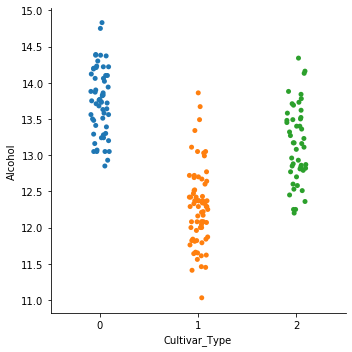

In [34]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Alcohol",data=Model_DF)

In [35]:
#Almost three types are having nearly same spread of datapoints related to alcohol due to which the feature is not highly significant in differentiating between the CultivarTypes

In [36]:
#Considering statistics of MalicAcid we can understand the following details 
Model_DF.groupby('Cultivar_Type')['MalicAcid'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,2.010678,0.688549,1.35,1.6650,1.770,1.9350,4.04
1,71.0,1.932676,1.015569,0.74,1.2700,1.610,2.1450,5.80
2,48.0,3.333750,1.087906,1.24,2.5875,3.265,3.9575,5.65


## <font color='purple'> MalicAcid </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            2.010678                                  1.932676                                  3.333750
#Minimum                  1.35                                      0.74                                      1.24
#Max                      4.04                                      5.80                                      5.65   

In [37]:
#Lets see individual correlation of MalicAcid with our label Cultivar_Type
Model_DF[['Cultivar_Type','MalicAcid']].corr()

,Cultivar_Type,MalicAcid
Cultivar_Type,1.000000,0.437776
MalicAcid,0.437776,1.000000


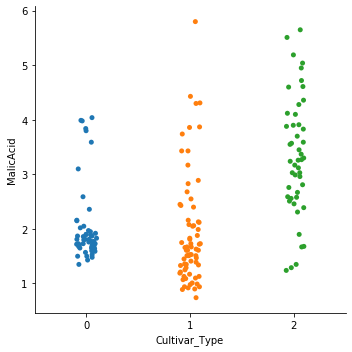

In [38]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="MalicAcid",data=Model_DF)

In [39]:
#Almost three types are having nearly same spread of datapoints related to Malicacid due to which the feature is not highly significant in differentiating between the CultivarTypes

In [40]:
#Considering statistics of Ash we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Ash'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,2.455593,0.227166,2.04,2.295,2.44,2.6150,3.22
1,71.0,2.244789,0.315467,1.36,2.000,2.24,2.4200,3.23
2,48.0,2.437083,0.184690,2.10,2.300,2.38,2.6025,2.86


## <font color='purple'> Ash </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            2.455593                                  2.244789                                  2.437083
#Minimum                  2.04                                      1.36                                      2.10
#Max                      3.22                                      3.23                                      2.86   

In [41]:
#Lets see individual correlation of Ash with our label Cultivar_Type(It wouldnt be much as there is no significant variation in the values for each type as seen above)
Model_DF[['Cultivar_Type','Ash']].corr()

,Cultivar_Type,Ash
Cultivar_Type,1.000000,-0.049643
Ash,-0.049643,1.000000


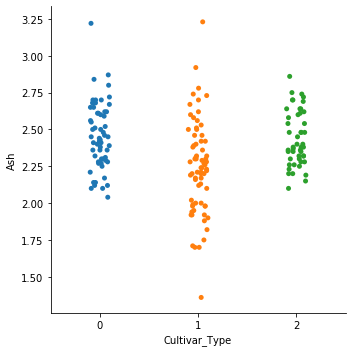

In [42]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Ash",data=Model_DF)

In [43]:
#Almost three types are having nearly same spread of datapoints related to Ash due to which the feature is not highly significant in differentiating between the CultivarTypes

In [44]:
#Considering statistics of Alkalinity we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Alkalinity'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,17.037288,2.546322,11.2,16.0,16.8,18.7,25.0
1,71.0,20.238028,3.349770,10.6,18.0,20.0,22.0,30.0
2,48.0,21.416667,2.258161,17.5,20.0,21.0,23.0,27.0


## <font color='purple'> Alkalinity </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

##  
                     Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            17.037288                                 20.238028                                 21.416667(significant variation)
#Minimum                  11.2                                      10.6                                      17.5     (significant variation)
#Max                      25.0                                      30.0                                      27.0     (significant variation)  

In [45]:
#Lets see individual correlation of Alkalinity with our label Cultivar_Type(It wouldnt be much as there is no significant variation in the values for each type as seen above)
Model_DF[['Cultivar_Type','Alkalinity']].corr()

,Cultivar_Type,Alkalinity
Cultivar_Type,1.000000,0.517859
Alkalinity,0.517859,1.000000


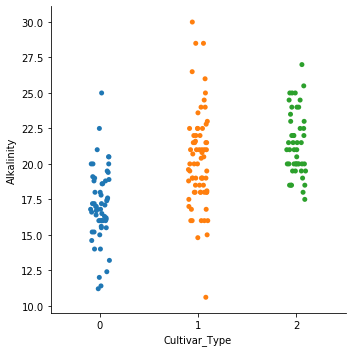

In [46]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Alkalinity",data=Model_DF)

In [47]:
#The three types are having different spread of datapoints(highest value,lowest values) related to alkalinity due to which the feature could be significant in differentiating between the CultivarTypes

In [48]:
#Considering statistics of Alkalinity we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Magnesium'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,106.338983,10.498949,89.0,98.00,104.0,114.0,132.0
1,71.0,94.549296,16.753497,70.0,85.50,88.0,99.5,162.0
2,48.0,99.312500,10.890473,80.0,89.75,97.0,106.0,123.0


## <font color='purple'> Magnesium </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            106.338983                                 94.549296                                 99.312500
#Minimum                  89.0                                       70.0                                      80.0     
#Max                      132.0                                      162.0                                     123.0     

In [49]:
#Lets see individual correlation of Magnesium with our label Cultivar_Type
Model_DF[['Cultivar_Type','Magnesium']].corr()

,Cultivar_Type,Magnesium
Cultivar_Type,1.000000,-0.209179
Magnesium,-0.209179,1.000000


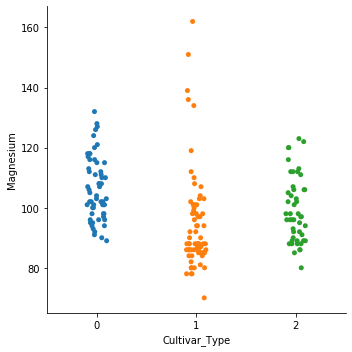

In [50]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Magnesium",data=Model_DF)

In [51]:
#Almost three types are having nearly same spread of datapoints related to Magnesium due to which the feature is not highly significant in differentiating between the CultivarTypes

In [52]:
#Considering statistics of Phenols we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Phenols'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,2.840169,0.338961,2.20,2.6000,2.800,3.0000,3.88
1,71.0,2.258873,0.545361,1.10,1.8950,2.200,2.5600,3.52
2,48.0,1.678750,0.356971,0.98,1.4075,1.635,1.8075,2.80


## <font color='purple'> Phenols </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            2.840169                                 2.258873                                 1.678750   (significant variation)
#Minimum                  2.20                                      1.10                                      0.98     (significant variation)
#Max                      3.88                                      3.52                                      2.80     (significant variation)  

In [53]:
#Lets see individual correlation of Phenols with our label Cultivar_Type
Model_DF[['Cultivar_Type','Phenols']].corr()

,Cultivar_Type,Phenols
Cultivar_Type,1.000000,-0.719163
Phenols,-0.719163,1.000000


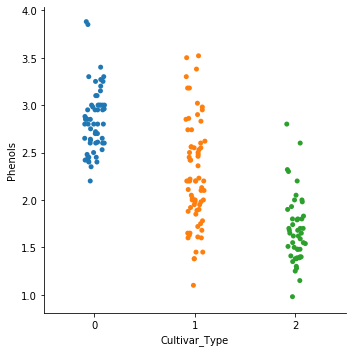

In [54]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Phenols",data=Model_DF)

In [55]:
#The three types are having different spread of datapoints(highest value,lowest values) related to phenols due to which the feature could be significant in differentiating between the CultivarTypes

In [56]:
#Considering statistics of Flavanoids we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Flavanoids'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,2.982373,0.397494,2.19,2.680,2.980,3.245,3.93
1,71.0,2.080845,0.705701,0.57,1.605,2.030,2.475,5.08
2,48.0,0.781458,0.293504,0.34,0.580,0.685,0.920,1.57


## <font color='purple'> Flavanoids </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            2.982373                                 2.080845                                 0.781458(significant variation)
#Minimum                  2.19                                      0.57                                      0.34   (significant variation)  
#Max                      3.93                                      5.08                                      1.57    (significant variation)  

In [57]:
#Lets see individual correlation of Flavanoids with our label Cultivar_Type
Model_DF[['Cultivar_Type','Flavanoids']].corr()

,Cultivar_Type,Flavanoids
Cultivar_Type,1.000000,-0.847498
Flavanoids,-0.847498,1.000000


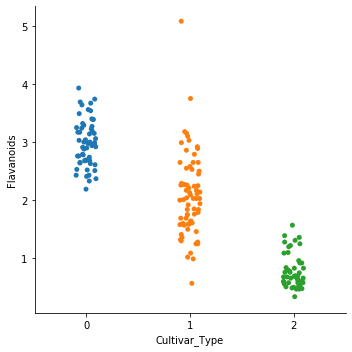

In [58]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Flavanoids",data=Model_DF)

In [59]:
#The three types are having different spread of datapoints(highest value,lowest values) related to Flavanoids due to which the feature could be significant in differentiating between the CultivarTypes

In [60]:
#Considering statistics of NonFlavanoids we can understand the following details 
Model_DF.groupby('Cultivar_Type')['NonFlavanoids'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,0.290000,0.070049,0.17,0.2550,0.29,0.32,0.50
1,71.0,0.363662,0.123961,0.13,0.2700,0.37,0.43,0.66
2,48.0,0.447500,0.124140,0.17,0.3975,0.47,0.53,0.63


## <font color='purple'> NonFlavanoids </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 

                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            0.290000                                  0.363662                                  0.447500(significant variation)
#Minimum                  0.17                                      0.13                                      0.17     (significant variation)
#Max                      0.50                                      0.66                                      0.63     (significant variation)  

In [61]:
#Lets see individual correlation of NonFlavanoids with our label Cultivar_Type
Model_DF[['Cultivar_Type','NonFlavanoids']].corr()

,Cultivar_Type,NonFlavanoids
Cultivar_Type,1.000000,0.489109
NonFlavanoids,0.489109,1.000000


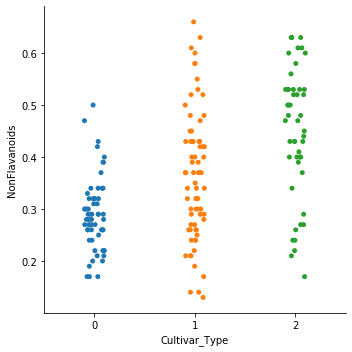

In [62]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="NonFlavanoids",data=Model_DF)

In [63]:
#Almost three types are having nearly same spread of datapoints related to NonFlavanods due to which the feature is not highly significant in differentiating between the CultivarTypes

In [64]:
#Considering statistics of Pcyanins we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Pcyanins'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,1.899322,0.412109,1.25,1.640,1.870,2.090,2.96
1,71.0,1.630282,0.602068,0.41,1.350,1.610,1.885,3.58
2,48.0,1.153542,0.408836,0.55,0.855,1.105,1.350,2.70


## <font color='purple'> Pcyanins </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 

                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            1.899322                                 1.630282                                 1.153542
#Minimum                  1.25                                      0.41                                      0.55     
#Max                      2.96                                      3.58                                      2.70       

In [65]:
#Lets see individual correlation of Pcyanins with our label Cultivar_Type
Model_DF[['Cultivar_Type','Pcyanins']].corr()

,Cultivar_Type,Pcyanins
Cultivar_Type,1.00000,-0.49913
Pcyanins,-0.49913,1.00000


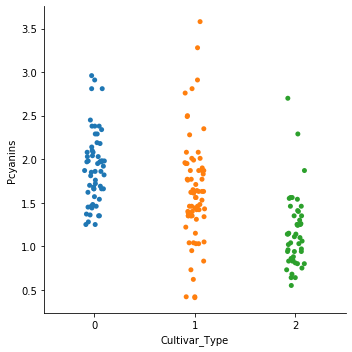

In [66]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Pcyanins",data=Model_DF)

In [67]:
#Almost three types are having nearly same spread of datapoints related to Pcyanins due to which the feature is not highly significant in differentiating between the CultivarTypes

In [68]:
#Considering statistics of ColorIntensity we can understand the following details 
Model_DF.groupby('Cultivar_Type')['ColorIntensity'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,5.528305,1.238573,3.52,4.5500,5.40,6.225,8.9
1,71.0,3.086620,0.924929,1.28,2.5350,2.90,3.400,6.0
2,48.0,7.396250,2.310942,3.85,5.4375,7.55,9.225,13.0


## <font color='purple'> ColorIntensity </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

##  
                     Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            5.528305                                 3.086620                                 7.396250
#Minimum                  3.52                                      1.28                                      3.85     
#Max                      8.9                                       6.0                                       13.0      

In [69]:
#Lets see individual correlation of ColorIntensity with our label Cultivar_Type
Model_DF[['Cultivar_Type','ColorIntensity']].corr()

,Cultivar_Type,ColorIntensity
Cultivar_Type,1.000000,0.265668
ColorIntensity,0.265668,1.000000


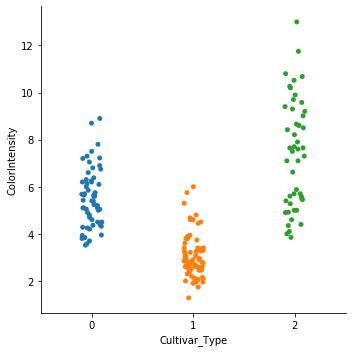

In [70]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="ColorIntensity",data=Model_DF)

In [71]:
#Almost three types are having nearly same spread of datapoints related to ColorIntensity due to which the feature is not highly significant in differentiating between the CultivarTypes

In [72]:
#Considering statistics of Hue we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Hue'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,1.062034,0.116483,0.82,0.9950,1.070,1.1300,1.28
1,71.0,1.056282,0.202937,0.69,0.9250,1.040,1.2050,1.71
2,48.0,0.682708,0.114441,0.48,0.5875,0.665,0.7525,0.96


## <font color='purple'> Hue </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            1.062034                                 1.056282                                 0.682708(significant variation)
#Minimum                  0.82                                      0.69                                      0.48     (significant variation)
#Max                      1.28                                      1.71                                      0.96     (significant variation)  

In [73]:
#Lets see individual correlation of Hue with our label Cultivar_Type
Model_DF[['Cultivar_Type','Hue']].corr()

,Cultivar_Type,Hue
Cultivar_Type,1.000000,-0.617369
Hue,-0.617369,1.000000


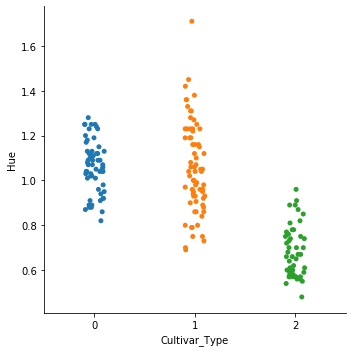

In [74]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Hue",data=Model_DF)

In [75]:
#The three types are having different spread of datapoints(highest value,lowest values) related to Hue due to which the feature could be significant in differentiating between the CultivarTypes

In [76]:
#Considering statistics of OD280 we can understand the following details 
Model_DF.groupby('Cultivar_Type')['OD280'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,3.157797,0.357077,2.51,2.87,3.17,3.42,4.00
1,71.0,2.785352,0.496573,1.59,2.44,2.83,3.16,3.69
2,48.0,1.683542,0.272111,1.27,1.51,1.66,1.82,2.47


## <font color='purple'> OD280 </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

##                       
                      Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            3.157797                                 2.785352                                 1.683542(significant variation)
#Minimum                  2.51                                      1.59                                      1.27     (significant variation)
#Max                      4.00                                      3.69                                      2.47     (significant variation)  

In [77]:
#Lets see individual correlation of OD280 with our label Cultivar_Type
Model_DF[['Cultivar_Type','OD280']].corr()

,Cultivar_Type,OD280
Cultivar_Type,1.00000,-0.78823
OD280,-0.78823,1.00000


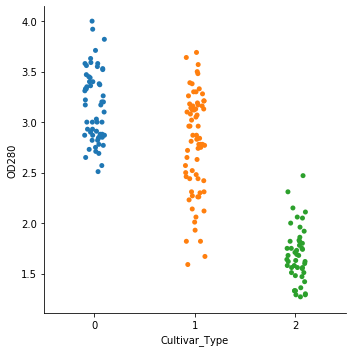

In [78]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="OD280",data=Model_DF)

In [79]:
#The three types are having different spread of datapoints(highest value,lowest values) related to OD280 due to which the feature could be significant in differentiating between the CultivarTypes

In [80]:
#Considering statistics of Proline we can understand the following details 
Model_DF.groupby('Cultivar_Type')['Proline'].describe()

,count,mean,std,min,25%,50%,75%,max
Cultivar_Type,,,,,,,,
0,59.0,1115.711864,221.520767,680.0,987.5,1095.0,1280.0,1680.0
1,71.0,519.507042,157.211220,278.0,406.5,495.0,625.0,985.0
2,48.0,629.895833,115.097043,415.0,545.0,627.5,695.0,880.0


## <font color='purple'> Proline </font>
## <font color='orange'> Cultivar1 </font>   <font color='orange'> Cultivar2 </font>     <font color='orange'> Cultivar3 </font> 

## 
                        Cultivar1                                 Cultivar2                                  Cultivar3  
#No.of values             59                                         71                                         48
#Average value            1115.711864                               519.507042                                629.895833(significant variation)
#Minimum                  680.0                                     278.0                                    415.0     (significant variation)
#Max                      1680.0                                    985.0                                   880.0     (significant variation)  

In [81]:
#Lets see individual correlation of Proline with our label Cultivar_Type
Model_DF[['Cultivar_Type','Proline']].corr()

,Cultivar_Type,Proline
Cultivar_Type,1.000000,-0.633717
Proline,-0.633717,1.000000


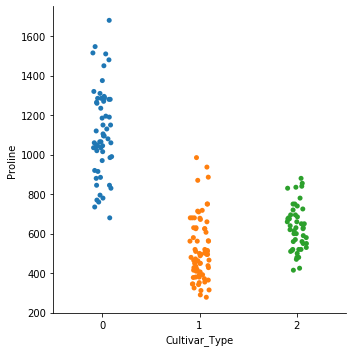

In [82]:
#Visualizing the spread
sns.catplot(x="Cultivar_Type", y="Proline",data=Model_DF)

In [83]:
#The three types are having different spread of datapoints(highest value,lowest values) related to Proline due to which the feature could be significant in differentiating between the CultivarTypes

In [84]:
#sns.catplot(x="Cultivar_Type", y="Alcohol", kind="box",data=Model_DF.sort_values("Cultivar_Type"))

In [85]:
#sns.catplot(x="Cultivar_Type", y="Alcohol", hue="Cultivar_Type", kind="box", data=Model_DF);

In [86]:
#Checking the correlation of each feature with target variable by observing the last column in heat map

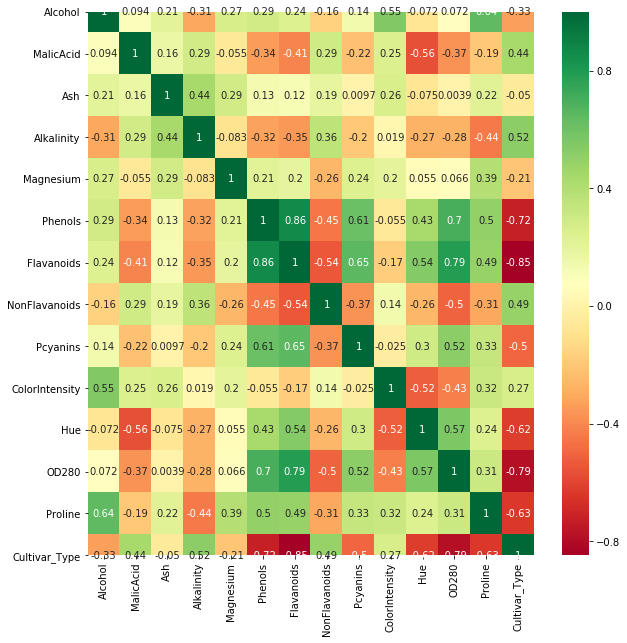

In [87]:
Selected_features = ['Alcohol','MalicAcid','Ash','Alkalinity','Magnesium','Phenols','Flavanoids','NonFlavanoids','Pcyanins','ColorIntensity','Hue','OD280','Proline','Cultivar_Type']
X = Model_DF[Selected_features]

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## <font color='purple'>We can see that six features are highly correlated above positive (0.5) - 1 and above negative (0.5) -5 </font>

In [88]:
#On the basis of individual correlation coefficients, we are determining which independent variables are useful in predicting the target value 
#Correlation coefficient value ranges from -1 to +1; closer to 1, stronger the relationship. 
#Also, only correlation coefficients greater than 0.5 in magnitude are considered for further inclusion in the model.
#These variables are considered relevant attributes for prediction of Cultivar Type.

In [89]:
#For more clear values lets see correlation matrix instead of heatmap

In [90]:
Model_DF.corr()

,Alcohol,MalicAcid,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,NonFlavanoids,Pcyanins,ColorIntensity,Hue,OD280,Proline,Cultivar_Type
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
MalicAcid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alkalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
NonFlavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Pcyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
ColorIntensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


## <font color='purple'>Flavonoids is the first high negatively correlated value: -0.847498  </font>
## <font color='purple'>OD280 is the second high negatively correlated value: -0.788230  </font>
## <font color='purple'>Phenols is the third high negatively correlated value: -0.719163 </font>
## <font color='purple'>Hue is the fourth high negatively correlated value: -0.617369  </font>
## <font color='purple'>Proline is the fifth high negatively correlated value: -0.633717  </font>
## <font color='purple'>Alkalinity  is the sixth positively correlated value: 0.517859  </font>


In [91]:
#Checking the distribution again
Model_DF.groupby(['Cultivar_Type']).size()

Cultivar_Type
0    59
1    71
2    48
dtype: int64

In [92]:
Model_DF.head()

,Alcohol,MalicAcid,Ash,Alkalinity,Magnesium,Phenols,Flavanoids,NonFlavanoids,Pcyanins,ColorIntensity,Hue,OD280,Proline,Cultivar_Type
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## <font color='purple'>Considering only highly correlated features Flavanoids,OD280,Phenols,Hue,Proline,Alkalinity for training and testing the model </font>

In [93]:
Wine_Corr_features_DF = Model_DF[['Alkalinity','Phenols','Flavanoids','Hue','OD280','Proline']]

In [94]:
#Input data to model (features)
Wine_Corr_features_DF.head()

,Alkalinity,Phenols,Flavanoids,Hue,OD280,Proline
0,15.6,2.80,3.06,1.04,3.92,1065
1,11.2,2.65,2.76,1.05,3.40,1050
2,18.6,2.80,3.24,1.03,3.17,1185
3,16.8,3.85,3.49,0.86,3.45,1480
4,21.0,2.80,2.69,1.04,2.93,735


In [95]:
Wine_Target_DF = Model_DF['Cultivar_Type']

In [96]:
#Label data to model (target variable)
Wine_Target_DF.head()

0    0
1    0
2    0
3    0
4    0
Name: Cultivar_Type, dtype: int64

## Question5.	If your chosen algorithm demands training and test datasets, split your wine dataset using an 80/20 split. If dataset is split, evaluate your training and test datasets to ensure they are representative of your full data set. 

## <font color='purple'>To Train and Test the Logistic Regression Model, split dataset 80-20%</font>

In [97]:
#Importing the train test split function from sklearn
from sklearn.model_selection import train_test_split

In [98]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(Wine_Corr_features_DF,Wine_Target_DF, test_size=0.20, random_state = 1)

In [99]:
#Loking at train data
X_train

,Alkalinity,Phenols,Flavanoids,Hue,OD280,Proline
91,22.0,1.45,1.25,1.05,2.65,450
81,18.8,2.20,2.53,1.16,3.14,714
114,22.5,2.56,2.29,0.93,3.19,385
48,18.8,2.75,2.92,1.07,2.75,1060
54,16.4,2.60,2.90,0.92,3.20,1060
...,...,...,...,...,...,...
133,21.5,1.70,1.20,0.78,1.29,600
137,25.0,1.79,0.60,0.82,1.69,515
72,24.0,1.88,1.84,0.98,2.78,472
140,21.0,1.54,0.50,0.77,2.31,600


In [100]:
#Checking the shape of all splits
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((142, 6), (142,), (36, 6), (36,))

In [101]:
# Get a tuple of unique values & their frequency in numpy array for trainig data
uniqueValues, occurCount = np.unique(Y_train, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2]
Occurrence Count :  [45 58 39]


In [102]:
#Total records split for training is 142
#Number of Cultivar1 type in training data are (45) -- (45/142)-- 31.69%
#Number of Cultivar2 type in training data are (58) -- (58/142)-- 40.84% 
#Number of Cultivar3 type in training data are (39) -- (39/142)-- 27.46%
################################################################################
#Number of Cultivar1 type in training data are (59) -- (59/178)-- 33.14%
#Number of Cultivar2 type in training data are (71) -- (71/115)-- 39.88% 
#Number of Cultivar3 type in training data are (48) -- (48/115)-- 26.96%

In [103]:
#displaying training datasets
print(X_train,Y_train)

     Alkalinity  Phenols  Flavanoids   Hue  OD280  Proline
91         22.0     1.45        1.25  1.05   2.65      450
81         18.8     2.20        2.53  1.16   3.14      714
114        22.5     2.56        2.29  0.93   3.19      385
48         18.8     2.75        2.92  1.07   2.75     1060
54         16.4     2.60        2.90  0.92   3.20     1060
..          ...      ...         ...   ...    ...      ...
133        21.5     1.70        1.20  0.78   1.29      600
137        25.0     1.79        0.60  0.82   1.69      515
72         24.0     1.88        1.84  0.98   2.78      472
140        21.0     1.54        0.50  0.77   2.31      600
37         18.0     2.45        2.43  1.12   2.51     1105

[142 rows x 6 columns] 91     1
81     1
114    1
48     0
54     0
      ..
133    2
137    2
72     1
140    2
37     0
Name: Cultivar_Type, Length: 142, dtype: int64


In [104]:
# Get a tuple of unique values & their frequency in numpy array for testing data
uniqueValues, occurCount = np.unique(Y_test, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2]
Occurrence Count :  [14 13  9]


In [105]:
#Total records split for testing is 36
#Number of Cultivar1 type in training data are (14) -- (14/36)-- 38.88%
#Number of Cultivar2 type in training data are (13) -- (13/36)-- 36.11% 
#Number of Cultivar3 type in training data are (9) -- (9/36)-- 25.00%
################################################################################
#Number of Cultivar1 type in training data are (59) -- (59/178)-- 33.14%
#Number of Cultivar2 type in training data are (71) -- (71/178)-- 39.88% 
#Number of Cultivar3 type in training data are (48) -- (48/178)-- 26.96%

## <font color='orange'>Total records split for training is 142</font>

### <font color='purple'>Number of Cultivar1 type in training data are (45) -- (45/142)-- 31.69%</font>
### <font color='purple'>Number of Cultivar2 type in training data are (58) -- (58/142)-- 40.84%</font>
### <font color='purple'>Number of Cultivar3 type in training data are (39) -- (39/142)-- 27.46%</font>

## <font color='orange'>Total records split for testing is 36</font>
### <font color='purple'>Number of Cultivar1 type in training data are (14) -- (14/36)-- 38.88%</font>
### <font color='purple'>Number of Cultivar2 type in training data are (58) -- (13/36)-- 36.11%</font>
### <font color='purple'>Number of Cultivar3 type in training data are (39) -- (9/136)-- 25.00%</font>
        
## <font color='orange'> Overall records are 178 </font>      
### <font color='purple'>Number of Cultivar1 type in training data are (59) -- (59/178)-- 33.14%</font>
### <font color='purple'>Number of Cultivar2 type in training data are (71) -- (71/115)-- 39.88%</font>
### <font color='purple'>Number of Cultivar3 type in training data are (48) -- (48/115)-- 26.96%</font>

# <font color='blue'>The training dataset split is representative of overall data as there is only 1 or 2 percents split variation compared to percentages of overall data</font> 
# <font color='blue'>The testing dataset split is also slightly representative of overall data as there is 4 or 5 percents split variation compared to percentages of overall data</font>

In [106]:
#Import Logistic regression from SKLearn Libraries
from sklearn.linear_model import LogisticRegression

# Question6.Use the relevant portion of your dataset to train the model of your selected machine learning algorithm. Do all the necessary preprocessing to determine the parameters for your selected algorithm. For example, you will need to specify (and justify) the number of clusters if you choose to use KMeans clustering algorithm via the Elbow curve, Silhouette analysis, etc. 

In [107]:
#Creting an instance of Logistic regression using multi_class function
log_reg = LogisticRegression(solver='newton-cg',multi_class='multinomial')
#Applying training data to the model
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
#Generating training predictions

In [109]:
#Generate predictions to evaluate the trained model using X_Train data. 
Ytrain_predict = log_reg.predict(X_train)

In [110]:
# Our resulting Y_predict variable is of shape (142,). so, it needs to be converted to (142,1) 2-D array
# to a new result dataframe
predict_ytrain = Ytrain_predict.reshape(-1,1)
print(predict_ytrain.shape)

(142, 1)


In [111]:
# The Y_train contains values of our target variable (Cultivar). There were 142 records in the training data. So, Y_train
# has a shape of (142,) - one dimesional. We'll need to reshape this into 2-D (142 rows, 1 column of Y-values)

train_y = (Y_train.values).reshape(-1,1)
print(train_y.shape)
print(train_y.size)

(142, 1)
142


In [112]:
# We need to obtain probabilities for our predictions. For this, we need to use predict_proba() function of the 
# logistic regression model we instantiated earlier during model training and predictions. 

train_predicted_probs = log_reg.predict_proba(X_train)
print(train_predicted_probs)

[[4.78513363e-04 8.52889144e-01 1.46632343e-01]
 [2.01475016e-01 7.97550612e-01 9.74371886e-04]
 [8.39946953e-04 9.94999122e-01 4.16093110e-03]
 [9.82223215e-01 1.77245754e-02 5.22093576e-05]
 [9.94474029e-01 5.52131105e-03 4.66014894e-06]
 [3.87354925e-03 8.94642696e-01 1.01483755e-01]
 [2.14767516e-05 4.67127279e-02 9.53265795e-01]
 [8.42262032e-01 1.57731415e-01 6.55252530e-06]
 [9.81741971e-01 1.82520413e-02 5.98756572e-06]
 [9.32995227e-01 6.69810230e-02 2.37500386e-05]
 [2.17649359e-01 7.72067397e-01 1.02832445e-02]
 [9.98514264e-01 1.47974327e-03 5.99264328e-06]
 [9.99999617e-01 3.82804368e-07 1.35185106e-10]
 [9.99862524e-01 1.37417040e-04 5.88200682e-08]
 [2.88137109e-04 8.36745508e-01 1.62966355e-01]
 [8.40188355e-04 8.66183081e-02 9.12541504e-01]
 [3.14111133e-04 4.93488797e-02 9.50337009e-01]
 [9.99814702e-01 1.84841430e-04 4.56626842e-07]
 [1.31696931e-03 9.45845040e-01 5.28379911e-02]
 [7.87916757e-01 2.09429676e-01 2.65356700e-03]
 [8.94594675e-01 1.05365618e-01 3.970675

# As mentioned the output of the multicalss logistic regression is set of probabilities based on which the predictions are generated

In [113]:
#Finally, we add all five variables into a Pandas Dataframe for display purposes. 

np.set_printoptions(suppress=True)  # this is to prevent small values being displayed in scientific notations

train_prob_results_df = pd.DataFrame(train_predicted_probs)
train_prob_results_df["Predicted"] = predict_ytrain
train_prob_results_df["Actual"] = train_y
train_prob_results_df.head(10)


,0,1,2,Predicted,Actual
0,0.000479,0.852889,0.146632,1,1
1,0.201475,0.797551,0.000974,1,1
2,0.000840,0.994999,0.004161,1,1
3,0.982223,0.017725,0.000052,0,0
4,0.994474,0.005521,0.000005,0,0
5,0.003874,0.894643,0.101484,1,1
6,0.000021,0.046713,0.953266,2,2
7,0.842262,0.157731,0.000007,0,0
8,0.981742,0.018252,0.000006,0,0
9,0.932995,0.066981,0.000024,0,0


# 7.Using appropriate metrics for your chosen algorithm, evaluate the trained model. Explain and justify the worthiness of your trained model. 

In [114]:
# Let's evaluate the trained model based on predictions generated above

from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(train_y,predict_ytrain))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.96      0.93      0.95        58
           2       0.95      1.00      0.97        39

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [115]:
conf_matrix = metrics.confusion_matrix(train_y,predict_ytrain)
conf_matrix

array([[43,  2,  0],
       [ 2, 54,  2],
       [ 0,  0, 39]])

In [116]:
print("Accuracy:",metrics.accuracy_score(train_y,predict_ytrain))

Accuracy: 0.9577464788732394


In [117]:
print("Precision:",metrics.precision_score(train_y,predict_ytrain, average = "macro"))
print("Recall:",metrics.recall_score(train_y,predict_ytrain,average = "macro"))

Precision: 0.9570202606787973
Recall: 0.9621966794380588


In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(train_y,predict_ytrain, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9704574136792443


# The model is trained well as the AOC is almost 1.00(0.97) and all other metrics of Accuracy, Recall, Precision,,and F1-score are all above 95% and close 1.0, the highest value for all; metrics. 
# This means that the trained model couldidentify Cultivar0 as Cultivar0, Cultivar1 as Cultivar1 and  Cultivar2 as Cultivar2 . The model is trained to be able to distinguish between (and therfore, predict correctly) between Cultivar_Types.

# 8.	Next, use the relevant portion of your dataset (as dictated by the chosen algorithm) to evaluate the performance of your model. Again, use all relevant metrics for your algorithm to discuss the outcome in terms of model’s accuracy and usefulness in generating predictions. These may include such metrics as SSE, MSSE, Silhouette scores, completeness scores, confusion matrix, AOC curve, etc. as dictated by and available for your chosen machine language algorithm.

In [119]:
#Generate predictions to evaluate the testing model using X_Test data and predicting Y

Ytest_predict  = log_reg.predict(X_test)

In [120]:
# Our resulting Y_predict variable is of shape (36,). so, it needs to be converted to (36,1) 2-D array
# to a new result dataframe
predict_ytest = Ytest_predict.reshape(-1,1)
print(predict_ytest.shape)

(36, 1)


In [121]:
# The Y_test contains values of our target variable (Cultivar). There were 36 records in the test data. So, Y_test
# has a shape of (36,) - one dimesional. We'll need to reshape this into 2-D (36 rows, 1 column of Y-values)

test_y = (Y_test.values).reshape(-1,1)
print(test_y.shape)
print(test_y.size)

(36, 1)
36


In [122]:
# We need to obtain probabilities for our predictions. For this, we need to use predict_proba() function of the 
# logistic regression model we instantiated earlier during model training and predictions. 

test_predicted_probs = log_reg.predict_proba(X_test)
print(test_predicted_probs)

[[0.00124438 0.14541987 0.85333574]
 [0.00024931 0.99177917 0.00797152]
 [0.90856123 0.09142627 0.0000125 ]
 [0.11310765 0.87362845 0.0132639 ]
 [0.99991003 0.00008965 0.00000032]
 [0.00030199 0.1318604  0.86783761]
 [0.01118626 0.97384264 0.01497109]
 [0.99999882 0.00000118 0.        ]
 [0.00012242 0.12428351 0.87559407]
 [0.00112898 0.87612219 0.12274883]
 [0.99941177 0.00058347 0.00000477]
 [0.19064413 0.80681374 0.00254213]
 [0.00041863 0.99630261 0.00327876]
 [0.99905849 0.00094147 0.00000005]
 [0.01729748 0.97969397 0.00300855]
 [0.00059132 0.97758738 0.0218213 ]
 [0.00000541 0.0668728  0.93312179]
 [0.91337946 0.08655103 0.00006951]
 [0.0002741  0.98940869 0.0103172 ]
 [0.99998852 0.00001142 0.00000005]
 [0.9996804  0.00031941 0.00000019]
 [0.00107912 0.99799582 0.00092506]
 [0.00237723 0.33865726 0.65896551]
 [0.73469882 0.26158409 0.00371709]
 [0.82340719 0.17657951 0.0000133 ]
 [0.00025132 0.15485769 0.84489099]
 [0.99025488 0.00974397 0.00000115]
 [0.99138541 0.00860528 0.00

In [123]:
#Finally, we add all three variables into a Pandas Dataframe for display purposes. 

np.set_printoptions(suppress=True)  
import pandas as pd
pd.set_option('display.precision',11)
pd.DataFrame({'2':[.001]}) 

# this is to prevent small values being displayed in scientific notations
test_prob_results_df = pd.DataFrame(test_predicted_probs)
test_prob_results_df["Predicted"] = predict_ytest
test_prob_results_df["Actual"] = test_y
test_prob_results_df.head(40)


# Note columns(0, 1 and 2) represents the probability of classifying an observation as being classified as 0,1 and 2 as it is a multinomial classification Cultivar1, Cultivar2, Cultivar3
# respectively. 
#So, for the first record, the value predicted by the model for Cultivar Type is "2" and the actual Cultivar_Type value for that observation in the test dataset is also "2"
#Probaility that this observation is correctly classified as being 2 is 0.85333574416. While the proabability that is is 
# misclassified as 0 is 0.00124438217 and as 1 is 0.14541987367 respectively

#Judging from these probabilities for all the 36 records, the model is predicting with high level of accuarcy.
#Since high-level here is Hard to say. It can be interpreted correctly by evaluating various metrics. 

,0,1,2,Predicted,Actual
0,0.00124438217,0.14541987367,0.85333574416,2,2
1,0.00024930729,0.99177917166,0.00797152105,1,1
2,0.90856123347,0.09142626903,0.00001249749,0,0
3,0.11310764941,0.87362844791,0.01326390267,1,1
4,0.99991003185,0.00008964675,0.00000032141,0,0
5,0.00030199243,0.13186040241,0.86783760516,2,2
6,0.01118626377,0.97384264313,0.01497109310,1,1
7,0.99999882476,0.00000117515,0.00000000010,0,0
8,0.00012242006,0.12428350881,0.87559407113,2,2
9,0.00112897634,0.87612219227,0.12274883139,1,1


In [124]:
#In case of more data we could have trained the model more better

In [125]:
# Let's evaluate the model based on predictions generated above

from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(Y_test,Ytest_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



In [126]:
conf_matrix = metrics.confusion_matrix(Y_test, Ytest_predict)
conf_matrix

array([[13,  1,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]])

# Understanding the confusion metrics output of multiclass-classification
                     
                       #Predicted values
                             0   1   2
                      0  ([[13,  1,  0],
#Actual values        1    [ 1, 12,  0],
                      2    [ 0,  0,  9]])
                      
Based on the Confusion Matrix, we can see that the predictive performance of the trained model is very
good. Of the total 36 cases, 94.4% are predicted correctly (36.11% Cultivar0, 33.33% Cultivar1 and 25% Cultivar2 ) while only
5.6% are incorrectly predicted. This is further supported by the fact that Recall,Accuracy, Precision, and
F1-score is >= 0.94, very close to 1.0, the ideal score. 

In [127]:
print("Accuracy:",metrics.accuracy_score(Y_test, Ytest_predict))

Accuracy: 0.9444444444444444


In [128]:
print("Precision:",metrics.precision_score(Y_test,Ytest_predict, average = "macro"))
print("Recall:",metrics.recall_score(Y_test,Ytest_predict,average = "macro"))

Precision: 0.9505494505494506
Recall: 0.9505494505494506


In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(Y_test, Ytest_predict, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9604525908873734


# The AOC is also close to 1.0. Hence, the trained Logistic Regression model is useful in accuaretly predicting the Cultivar type based on the chemical characteristics of wine


            ## ######################################################################
            Accuracy of the model is : 94.4# percent(The model can calculate 94% accurately)
            ######################################################################
            Recall score of the complete model is 95%
            Recall score of predicting Cultivar = 0   is  93%
            Recall score of predicting Cultivar = 1   is  92%
            Recall score of predicting Cultivar = 2   is 100%
            #####################################################################
            Precision score of the complete model is 95%
            Precision score of predicting Cultivar = 0   is  93%
            Precision score of predicting Cultivar = 1   is  92%
            Precision score of predicting Cultivar = 2   is 100%
            #####################################################################
            F1 score of the complete model is 95%
            F1 score of predicting Cultivar = 0   is  93%
            F1 score of predicting Cultivar = 1   is  92%
            F1 score of predicting Cultivar = 2   is 100%
            #####################################################################

        ## #####
        # Area Under the Curve is calculated =0.96
        # Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s and 2's as 2's. By analogy, Higher the AUC, better the model is at distinguishing between Cultivar Types under three to three categories
        #As our Classification, auc score is 0.96 i.e; the model can classify between 0's, 1's,2's and predict them with around 94% accuracy
        #This indicates our model is worthy and also a good model in predicting the survival Cultivar categories

       ## #####################################################################
       #Recall:
        It talks about the quality of the machine learning model when it comes
        to predicting a positive class. So out of total positive classes, how many
        was the model able to predict correctly? This metric is widely used as
        evaluation criteria for classification models.
        The recall values of our model are
        ######################################################################
            Recall score of the complete model is 95%
            Recall score of predicting Cultivar = 0   is  93%
            Recall score of predicting Cultivar = 1   is  92%
            Recall score of predicting Cultivar = 2   is 100%
        #which is good
        #####################################################################
        #Precision:
        Precision is about the number of actual positive cases out of all the positive
        cases predicted by the model
        The precision values of our model are
        #####################################################################
            Precision score of the complete model is 95%
            Precision score of predicting Cultivar = 0   is  93%
            Precision score of predicting Cultivar = 1   is  92%
            Precision score of predicting Cultivar = 2   is 100%
        #which are good
        ################################################################
        #F1 Score:
        It considers both the precision p and the recall r of the test to compute the score
        The F1score values of our model are
        #which are good
        #####################################################################
            F1 score of the complete model is 95%
            F1 score of predicting Cultivar = 0   is  93%
            F1 score of predicting Cultivar = 1   is  92%
            F1 score of predicting Cultivar = 2   is 100%
        #####################################################################
        # Area Under the Curve is calculated =0.9604525908873734
        # Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between Cultivartypes that
        #As our Classification, auc score is 0.96 i.e; the model can classify between 0's, 1's, 2's and predict them with around 94# accuracy
        #This indicates our model is worthy and also a good model in predicting the Cultivar types
        ########################################################################
        Accuracy of the model is :94.4 percent(The model can calculate 94% accurately)

# In case of non linear data and high overlapping between the target classes we can use the following algorithms(Decision Tree and Random Forest) for classification when complexity and time are not a matter of issue(Optional)

In [130]:
# Checking Decision Tree Classifier

In [131]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [132]:
#Creating an instance of Decision tree classifier
DTC = DecisionTreeClassifier()

# Apllying Decision Tree Classifer on the training data
DTC = DTC.fit(X_train,Y_train)

DTC_prob = DTC.predict_proba(X_test)
#Predict the response for test dataset
DTC_y_pred = DTC.predict(X_test)

In [133]:
#Looking at the predictions
DTC_y_pred

array([1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1])

In [134]:
#Creating a pandas dataframe for Decision tree result
DTC_results_df = pd.DataFrame(DTC_prob)
test_prob_results_df["Predicted"] = DTC_y_pred
test_prob_results_df["Actual"] = test_y
test_prob_results_df.head(20)

,0,1,2,Predicted,Actual
0,0.00124438217,0.14541987367,0.85333574416,1,2
1,0.00024930729,0.99177917166,0.00797152105,1,1
2,0.90856123347,0.09142626903,0.00001249749,0,0
3,0.11310764941,0.87362844791,0.01326390267,1,1
4,0.99991003185,0.00008964675,0.00000032141,0,0
5,0.00030199243,0.13186040241,0.86783760516,2,2
6,0.01118626377,0.97384264313,0.01497109310,1,1
7,0.99999882476,0.00000117515,0.00000000010,0,0
8,0.00012242006,0.12428350881,0.87559407113,2,2
9,0.00112897634,0.87612219227,0.12274883139,1,1


In [135]:
print("Accuracy:",metrics.accuracy_score(Y_test, DTC_y_pred))
#Clearly has less accuracy compared to logistic regression model

Accuracy: 0.8888888888888888


In [136]:
# Let's evaluate the model based on predictions generated above

from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(Y_test,DTC_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.80      0.92      0.86        13
           2       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



In [137]:
#The precision, f1-score, recall are also less compared to logistic regression model

In [138]:
auc = multiclass_roc_auc_score(Y_test,DTC_y_pred, average="macro")
print("Area under curve : ", auc)
#Auc is less when compared to Logistic regression but 0.9 is not a bad value

Area under curve :  0.9089228002271481


In [139]:
# Random Forest is an ensemble technique which uses decision trees as the base learners it has if else loops which are time consuming

In [140]:
# Checking Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
RFC = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
RFC.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
# Actual class predictions
RF_predictions = RFC.predict(X_test)
# Probabilities for each class
RF_probs = RFC.predict_proba(X_test)[:, 1]

In [143]:
#Creating a pandas dataframe for Decision tree result
DTC_results_df = pd.DataFrame(RF_probs)
test_prob_results_df["Predicted"] = RF_predictions 
test_prob_results_df["Actual"] = test_y
test_prob_results_df.head(20)

,0,1,2,Predicted,Actual
0,0.00124438217,0.14541987367,0.85333574416,2,2
1,0.00024930729,0.99177917166,0.00797152105,1,1
2,0.90856123347,0.09142626903,0.00001249749,0,0
3,0.11310764941,0.87362844791,0.01326390267,1,1
4,0.99991003185,0.00008964675,0.00000032141,0,0
5,0.00030199243,0.13186040241,0.86783760516,2,2
6,0.01118626377,0.97384264313,0.01497109310,1,1
7,0.99999882476,0.00000117515,0.00000000010,0,0
8,0.00012242006,0.12428350881,0.87559407113,2,2
9,0.00112897634,0.87612219227,0.12274883139,1,1


In [144]:
print("Accuracy:",metrics.accuracy_score(Y_test,RF_predictions))
#Random forest also has accuracy value similar to logistic regression model

Accuracy: 0.9444444444444444


In [145]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,RF_predictions))
print(classification_report(Y_test,RF_predictions))
print(accuracy_score(Y_test,RF_predictions))


[[13  1  0]
 [ 1 12  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

0.9444444444444444


In [146]:
auc = multiclass_roc_auc_score(Y_test,RF_predictions, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.9604525908873734


In [147]:
# All the values like accuracy, f1score, recall, precision are same as logistic regression outputs which makes random forest also a good model to classify the Cultivar_Types